In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.figure as fig

## Download the data that was previously collected

In [2]:
!wget https://raw.githubusercontent.com/Unicamp-OpenPower/openpower/master/content/post/power-consumption-on-power/pwr.csv

--2020-12-17 01:09:04--  https://raw.githubusercontent.com/Unicamp-OpenPower/openpower/master/content/post/power-consumption-on-power/pwr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.92.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.92.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374314 (366K) [text/plain]
Saving to: ‘pwr.csv’

pwr.csv             100%[===================>] 365,54K  1,85MB/s    in 0,2s    

2020-12-17 01:09:04 (1,85 MB/s) - ‘pwr.csv’ saved [374314/374314]



## Moving Average Function

In [3]:
def moving_average(array):
    mv_avg = []
    for i in range(1,len(array)+1):
         mv_avg.append(sum(array[:i])/len(array[:i]))
    return mv_avg

## Creating sensors lists for parsing

In [4]:
sensors = ['Total Power', 'CPU1 Power', 'CPU2 Power', 'PCIE CPU1 Pwr', 'PCIE CPU2 Pwr']
sensors = [[], [], [], [], []]
time_elapsed = [[] for i in sensors]
total_power = sensors[0]
cpu1 = sensors[1]
cpu2 = sensors[2]
pcie1 = sensors[3]
pcie2 = sensors[4]

## Parsing and first graph

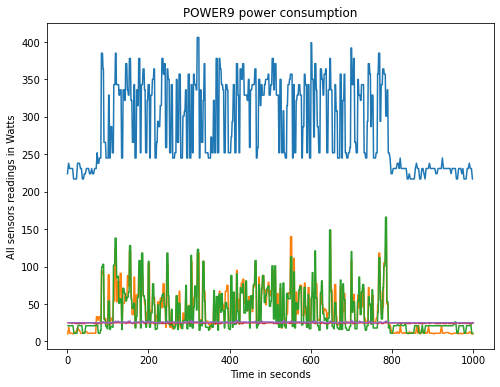

In [5]:
with open('pwr.csv', 'r') as file_in:
    read = csv.reader(file_in)
    for line in read:
        break
    i = 0
    for line in read:
        sensors[i].append(float(line[3]))
        time_elapsed[i].append(float(line[15]))
        i += 1
        if i == 5:
            i = 0

for i in range(0,5):
    plt.plot(time_elapsed[i], sensors[i])
    
plt.title("POWER9 power consumption")
plt.ylabel('All sensors readings in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)
#plt.savefig('test.png', dpi=100)
#plt.show()

## Total Power, CPU1, CPU2

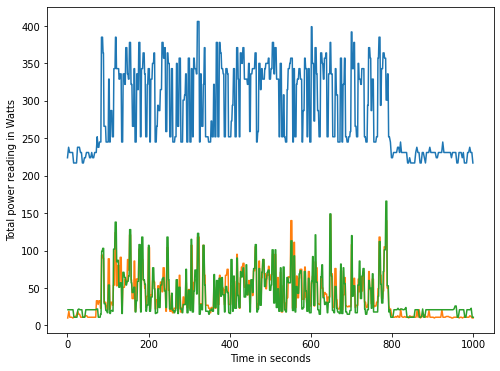

In [6]:
plt.plot(time_elapsed[0], total_power)
plt.plot(time_elapsed[1], cpu1)
plt.plot(time_elapsed[2], cpu2)
plt.ylabel('Total power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

## Total Power and Moving Average

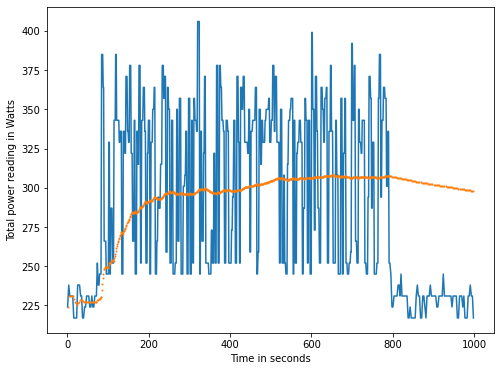

In [7]:
plt.plot(time_elapsed[0], total_power)
mv_avg_total = moving_average(total_power)
plt.plot(time_elapsed[0], mv_avg_total, 'o', markersize=1)
plt.ylabel('Total power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

## CPU1 Power

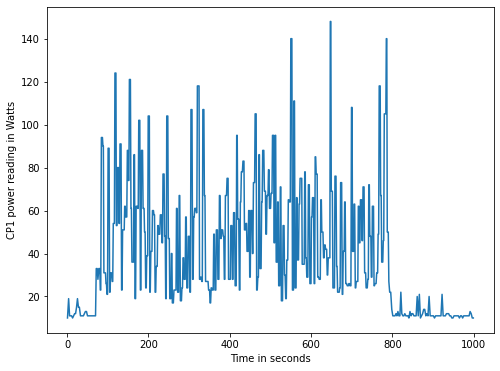

In [8]:
plt.plot(time_elapsed[1], cpu1)
plt.ylabel('CP1 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

## CPU2 Power

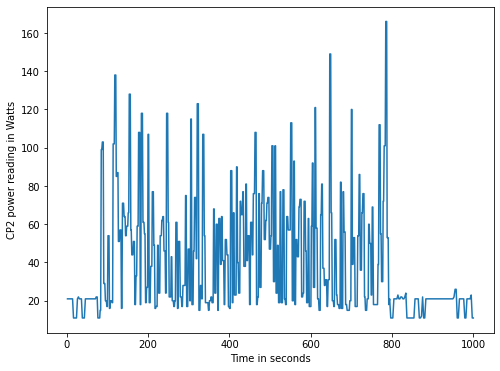

In [9]:
plt.plot(time_elapsed[2], cpu2)
plt.ylabel('CP2 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

## CPU1 PCIE Power

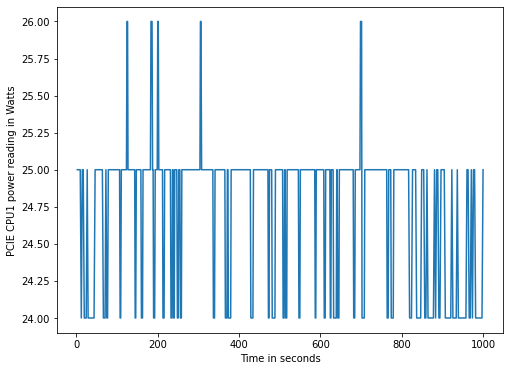

In [10]:
plt.plot(time_elapsed[3], pcie1)
plt.ylabel('PCIE CPU1 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

## CPU2 PCIE Power

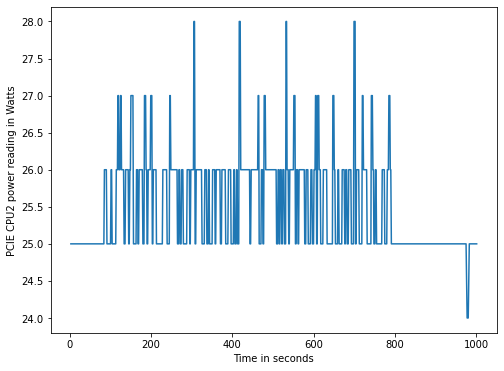

In [11]:
plt.plot(time_elapsed[4], pcie2)
plt.ylabel('PCIE CPU2 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)